<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Object-Oriented Programming: Coding a Normal Distribution Class

_Author: Justin Pounders (ATL)_

---

### Learning Objectives
- Learn the fundamentals of object-oriented programming in Python
- Review the solution to coefficients for multiple linear regression
- Apply object-oriented programming concepts to build a normal distribution class by hand

In [154]:
# The following modules are used for plotting and generating data
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd
%matplotlib inline

In [155]:
# These imports are needed by the class
import numpy as np
from scipy.special import erf

<a id='classes-objects'></a>

## Classes and Objects

---

In Python, everything is an "object" of some type. This is the basis of what is known as **object-oriented programming (OOP)**.

A *class* is a type of object. You can think of a class definition as a sort of blueprint that specifies the construction of a new object when instantiated.

> **Note:** Knowing how to define and use classes is essential for programming with Python at an intermediate or advanced level. We will cover the basics here, which will help you understand how concepts like distributions in `scipy.stats` or DataFrames in `pandas` work.


## Welcome to `class`

---

Want to make ~~some~~ a bank?

Think about a bank account...

- a "bank account" stores a balance
- you can do things with a "bank account"

  - withdraw money
  - deposit money
  - close the account
  
*Translation into the world of object oriented programming (OOP):*

- **object** = bank account... the generic "thing"
- **attribute** = balance... "data" associated with the object
- **methods** = withdraw/deposit/close... "functions" associated with the object
  
**It's often useful to sketch this out!**

---

Now let's do this in Python.  In python, objects are constructed using *classes* and are constructed using the `class` keyword.

In [156]:
class Account(object):
    
    def __init__(self):
        self.balance = 0
        
    def deposit(self, value):
        self.balance += value
        return self.balance
    
    def withdraw(self, value):
        if value > self.balance:
            raise Exception('Insufficient funds!')
            
        self.balance -= value
        return self.balance
    
    def close(self):
        cash = self.balance
        self.balance = 0.0
        
        return cash

In [159]:
my_account = Account()

my_account.deposit(100)
print('My balance is now ', my_account.balance)
my_account.withdraw(50)
print('My balance is now ', my_account.balance)

try:
    my_account.withdraw(60)
    print('My balance is now ', my_account.balance)
except:
    print('You need more money!!')

My balance is now  100
My balance is now  50
You need a more money!!


> A `class` is a template or blueprint.  When you create (or *instantiate*) a concrete variable (like `my_account`) then you have an object.

**Check:** Creating classes...

Next, let's recreate some of the functionality in `scipy.stats`.  We will create a Normal distribution object.

### The Shape of Normal

Mathematically, the probability density function (pdf) for the normal (or Gaussian) distribution can be written as follows:

$$
f(x | \mu, \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}.
$$

The cumulative distribution function (cdf), on the other hand, is

$$
F( x | \mu, \sigma^2) = \frac{1}{2} \left[ 1 + \text{erf}\left(\frac{x-\mu}{\sigma\sqrt{2}}\right) \right]
$$

where $\text{erf}(\cdot)$ is the "error function."  This error function is technically called a "special function" (yes, really), and for today's purposes we will calculate its value using the `erf` function imported from `scipy.stats` above.

Let's lay out some requirements:

- Class name will be `Gaussian`
- Attributes should include

  - `mu`, the mean
  - `sigma`, the standard deviation
  - `is_fit`, boolean indicating if mean/standard deviation were given or calculated
  
- Methods should include

  - `pdf`
  - `cdf`
  - `plot`
  - `fit`
  - `likelihood`

### Version 1

Let's start by implementing `pdf`, `cdf` and `plot`.

In [121]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        return 0.5*(1 + erf((x-self.mu)/(self.sigma*np.sqrt(2))))
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig

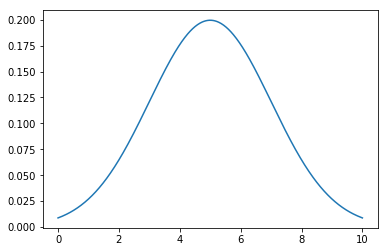

In [122]:
norm = Gaussian(5,2)
fig = norm.plot(0,10)

In [127]:
mu = 105
sigma = 20
test_norm = stats.norm(mu, sigma)

samples = test_norm.rvs(1000)
df = pd.DataFrame({'samples':samples})

### Version 2

Now let's implement `fit`.  You can fit a normal distribution to a set of data by calculating the mean and standard deviation of the data, then assigning these values to a normal distribution.

In [167]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        return 0.5*(1 + erf((x-self.mu)/(self.sigma*np.sqrt(2))))
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig
            
    def fit(self, data):
        self.mu = np.mean(data)
        self.sigma = np.std(data, ddof=1)
        return self

array([<matplotlib.axes._subplots.AxesSubplot object at 0x10ad1e0f0>], dtype=object)

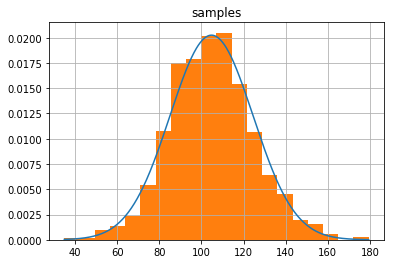

In [168]:
norm.fit(df.samples.values)
fig = norm.plot(df.samples.min(), df.samples.max())
df.hist(ax=fig.get_axes(), normed=True, bins=20)

### Version 3

Now let's add a `likelihood`.  In probability, the likelihood function tells us how likely it is that our data came from a given distribution.

For example, let's say that we have some normal distribution with fixed mean and standard deviation: $f(x | \mu, \sigma^2)$.

Now let's say we have a set of data, $x_1, x_2, x_3, ... x_N$ that we think are sampled from our normal distribution.

The likelihood function tells how well our data fit the distribution; it is calculated as

$$
\text{likelihood} = \prod_{i=1}^N f(x_i | \mu, \sigma^2)
$$

*These numbers can get really small!*  It is therefore very common to calculate the "log likelihood:"

$$
\text{log(likelihood)} = \sum_{i=1}^N \ln\left[f(x_i | \mu, \sigma^2)\right]
$$


In [ ]:
class Gaussian(object):
    
    def __init__(self, mu=0, sigma=1):
        self.mu = mu
        self.sigma = sigma
        self.is_fit = False
        
    def pdf(self, x):
        c = 1/np.sqrt(2*np.pi*self.sigma**2)
        e = - (x -self.mu)**2/(2*self.sigma**2)
        return c*np.exp(e)
    
    def cdf(self, x):
        return 0.5*(1 + erf((x-self.mu)/(self.sigma*np.sqrt(2))))
    
    def plot(self, x_min, x_max, func='pdf'):
        x = np.linspace(x_min, x_max, 501)
        
        
        fig, ax = plt.subplots()
        if func=='pdf':
            ax.plot(x, self.pdf(x))
        elif func=='cdf':
            ax.plot(x, self.cdf(x))
        else:
            raise Exception('Unknown function to plot: '+func)
            
        return fig
            
    def fit(self, data):
        self.mu = np.mean(data)
        self.sigma = np.std(data)
        return self
    
    def log_likelihood(self, data):
        return np.sum(np.log(self.pdf(data)))

In [160]:
l1 = norm.likelihood(df.samples.values)
l2 = Gaussian(107,20).likelihood(df.samples.values)
np.exp(l2-l1)

0.0019259064439112084

## Conclusion

---

We have seen how to define classes and instantiated objects with python.  This lesson only scrathes the surface of what is *possible*, but it also covers 60-80% of your actual use cases.

For more information, check out [Chapter 4](http://anandology.com/python-practice-book/object_oriented_programming.html) in the _Python Practice Book_.